### Импорт библиотек и данных

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
DATASET_PATH = 'train.csv'
tr_df = pd.read_csv(DATASET_PATH, sep = ',')

### Оптимизация (отключил, потому что выдает ошибку после обращения к колонкам "Cannot setitem on a Categorical with a new category, set the categories first")

### Общая информация

In [3]:
tr_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [162]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
tr_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [164]:
tr_df.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381


### Обработка данных

In [165]:
tr_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

count    10000.000000
mean        50.400800
std         43.587592
min          0.000000
25%         20.000000
50%         36.000000
75%         75.000000
max        209.000000
Name: DistrictId, dtype: float64


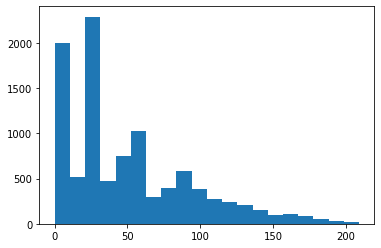

In [35]:
#РАЙОНЫ - выбросов нет, пропусков тоже
distr_describe = tr_df['DistrictId'].describe()
print(distr_describe)

plt.hist(tr_df['DistrictId'], bins = 20)
plt.show()

Rooms_unique: [ 3.  1.  2.  4.  5. 10.  0. 19.  6.]
count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64


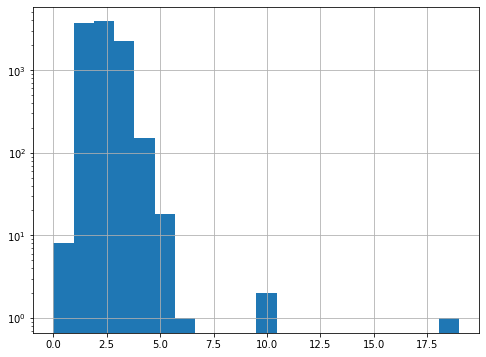

In [36]:
#КОМНАТЫ

rooms_describe = tr_df['Rooms'].describe()
rooms_values = tr_df['Rooms'].unique()
print(f"Rooms_unique: {rooms_values}")
print(rooms_describe)

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
tr_df['Rooms'].hist(bins = 20)
plt.yscale(value="log")
plt.show()

In [37]:
#Видим выбросы, убираем меньше 1 комнаты и больше 5
tr_df.loc[(tr_df['Rooms'] > 6) | (tr_df['Rooms'] < 1), 'Rooms'] = tr_df['Rooms'].median()
rooms_des = tr_df['Rooms'].describe()
print(rooms_des)

count    10000.000000
mean         1.888800
std          0.812096
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: Rooms, dtype: float64


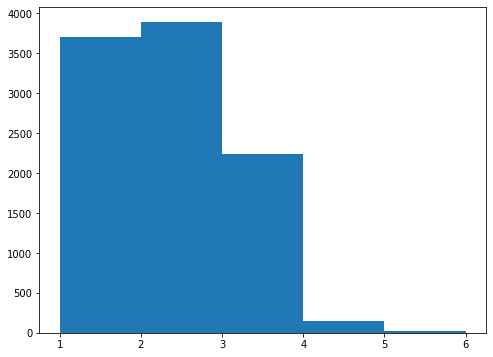

In [38]:
#КОМНАТЫ визуализация обработанных данных
plt.figure(figsize=[8, 6])
plt.hist(tr_df['Rooms'], bins=5)
plt.show()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64


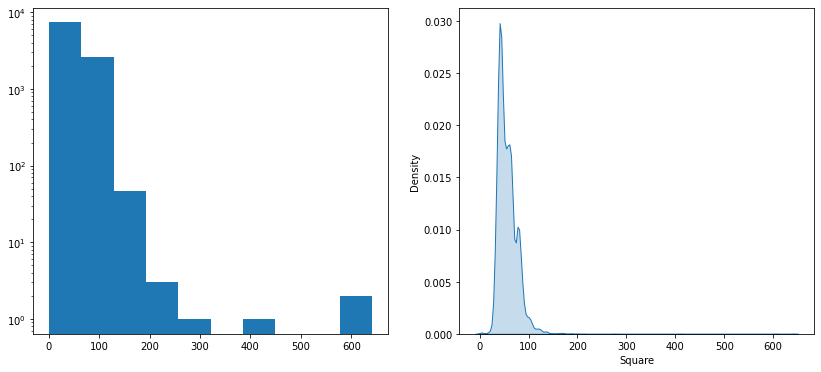

In [39]:
#КВАДРАТЫ

square_describe = tr_df['Square'].describe()
print(square_describe)

fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax1, ax2 = ax.flatten()
fig.set_size_inches(14, 6)

ax1.hist(tr_df['Square'], bins=10, log=True)
sns.kdeplot(tr_df['Square'], shade=True, legend=False)
plt.show()

In [40]:
#Отсекаем значения соответственно 0.025 и 0.975 квантилям и приравниваем к медиане
square_max_value = np.quantile(tr_df['Square'], q = 0.975)
square_min_value = np.quantile(tr_df['Square'], q = 0.025)
print(f'max_value = {square_max_value}\nmin_value = {square_min_value}\nmedian = {tr_df["Square"].median()}')

tr_df.loc[(tr_df['Square'] > square_max_value) | (tr_df['Square'] < square_min_value), 'Square'] = tr_df['Square'].median()
print(f"\n{tr_df['Square'].describe()}")

max_value = 100.90624548226137
min_value = 32.10518291149681
median = 52.51330992401352

count    10000.000000
mean        55.108599
std         15.215053
min         32.105270
25%         42.432730
50%         52.513310
75%         64.591720
max        100.904263
Name: Square, dtype: float64


<AxesSubplot:xlabel='Square', ylabel='Density'>

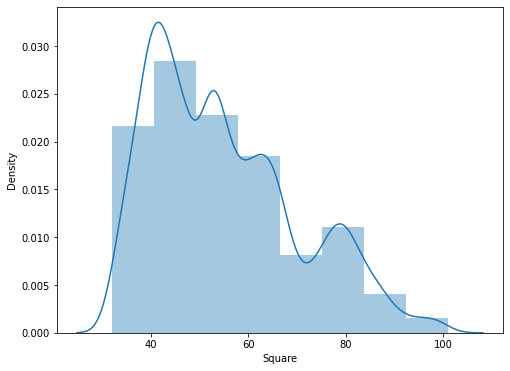

In [190]:
#КВАДРАТЫ визуализация обработанных данных
plt.figure(figsize=[8, 6])
sns.distplot(tr_df['Square'], bins = 8)

LifeSquare_null_count: 2113

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64


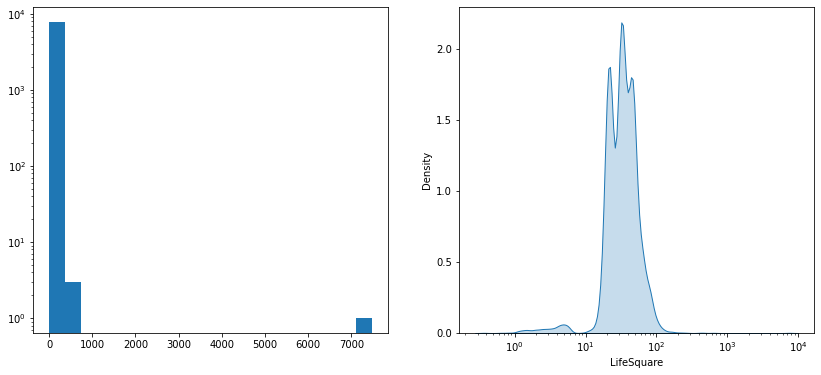

In [41]:
#ЖИЛАЯ ПЛОЩАДЬ
print(f'LifeSquare_null_count: {tr_df["LifeSquare"].isna().sum()}')
print(f'\n{tr_df["LifeSquare"].describe()}')

plt.figure(figsize=[14, 6])
plt.subplot(121)
plt.hist(tr_df['LifeSquare'], bins = 20, log=True)

plt.subplot(122)
sns.kdeplot(tr_df['LifeSquare'], log_scale=True, shade=True, legend=False)

plt.show()

In [42]:
#ЖП обработка пропусков

LS_median = tr_df['LifeSquare'].median()
tr_df['LifeSquare'] = tr_df['LifeSquare'].fillna(LS_median)
tr_df['LifeSquare'].isna().sum()

0

In [43]:
#ЖП обработка выбросов

q_top = tr_df['LifeSquare'].quantile(0.975)
q_bot = tr_df['LifeSquare'].quantile(0.025)
print(f"Нижний квантиль: {q_bot}")
print(f"Верхний квантиль: {q_top}")

tr_df.loc[(tr_df['LifeSquare'] < q_bot) | (tr_df['LifeSquare'] > q_top), 'LifeSquare'] = LS_median
print(f'\n{tr_df["LifeSquare"].describe()}')

Нижний квантиль: 15.146123972262354
Верхний квантиль: 78.3859441855343

count    10000.000000
mean        34.534440
std         11.451088
min         15.146290
25%         27.982505
50%         32.781260
75%         39.424685
max         78.384631
Name: LifeSquare, dtype: float64


<AxesSubplot:xlabel='LifeSquare', ylabel='Density'>

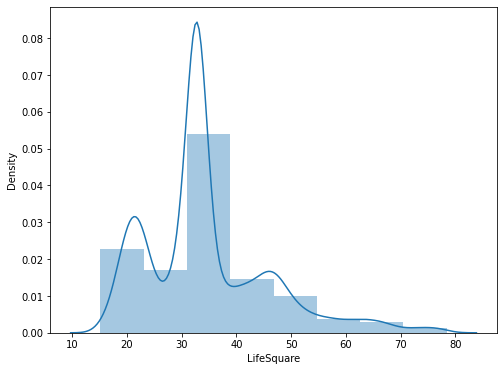

In [194]:
#ЖП визуализация обработанных данных
plt.figure(figsize=[8, 6])
sns.distplot(tr_df['LifeSquare'], bins = 8)


count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64


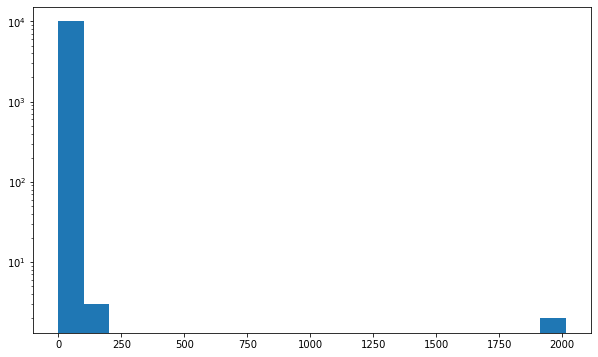

In [44]:
#ПЛОЩАДЬ КУХНИ
print(f'\n{tr_df["KitchenSquare"].describe()}')

plt.figure(figsize=[10, 6])
plt.hist(tr_df['KitchenSquare'], bins = 20, log=True)

plt.show()

In [45]:
#1 - У ПК отсутствуют пропуски => обрабатываем выбросы
#2 - Бывают квартиры-студии в которых комнаты совмещены с кухнями, соответственно нижний квантиль
#равный 0 не берем, срезаем только верх
KS_median = tr_df['KitchenSquare'].median()
q_top = tr_df['KitchenSquare'].quantile(0.975)
q_bot = tr_df['KitchenSquare'].quantile(0.025)

print(f"Нижний квантиль: {q_bot}")
print(f"Верхний квантиль: {q_top}")
print(f"Медиана: {KS_median}")

tr_df.loc[(tr_df['KitchenSquare'] > q_top, 'KitchenSquare')] = KS_median
print(f'\n{tr_df["KitchenSquare"].describe()}')

Нижний квантиль: 0.0
Верхний квантиль: 13.0
Медиана: 6.0

count    10000.000000
mean         5.536700
std          3.670668
min          0.000000
25%          1.000000
50%          6.000000
75%          8.000000
max         13.000000
Name: KitchenSquare, dtype: float64


<AxesSubplot:xlabel='KitchenSquare', ylabel='Density'>

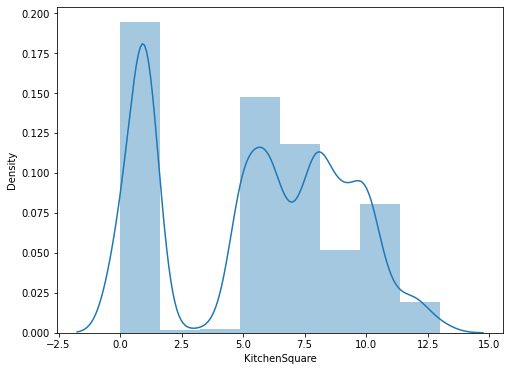

In [46]:
#ПК визуализация обработанных данных
plt.figure(figsize=[8, 6])
sns.distplot(tr_df['KitchenSquare'], bins = 8)

In [47]:
#ЭТАЖИ
floor_sorted = np.sort(tr_df['Floor'].unique())
print(f"Floor_unique: {floor_sorted}")

Floor_unique: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 31 32 33 37 42]


In [48]:
#ЭТАЖИ создание нового признака
tr_df['Floor_cat'] = 0

tr_df.loc[tr_df['Floor'] <= 3, 'Floor_cat'] = 1  
tr_df.loc[(tr_df['Floor'] > 3) & (tr_df['Floor'] <= 5), 'Floor_cat'] = 2
tr_df.loc[(tr_df['Floor'] > 5) & (tr_df['Floor'] <= 9), 'Floor_cat'] = 3
tr_df.loc[(tr_df['Floor'] > 9) & (tr_df['Floor'] <= 15), 'Floor_cat'] = 4
tr_df.loc[tr_df['Floor'] > 15, 'Floor_cat'] = 5

<AxesSubplot:xlabel='Floor', ylabel='Density'>

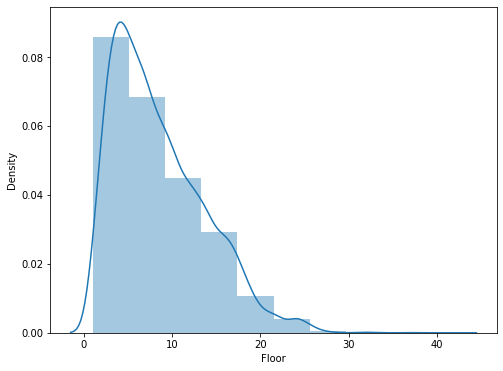

In [49]:
#ЭТАЖИ в обработке не нуждаются, все показатели вполне адекватные, пропусков нет
plt.figure(figsize=[8, 6])
sns.distplot(tr_df['Floor'], bins=10)

HouseFloor_unique: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  36.  37.  38.  39.  40.  44.  45.  47.  48.
  99. 117.]


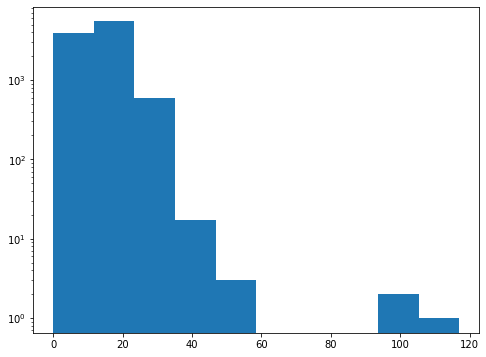

In [50]:
#ВЫСОТА ДОМА
hfloor_sorted = np.sort(tr_df['HouseFloor'].unique())
print(f"HouseFloor_unique: {hfloor_sorted}")

plt.figure(figsize=[8, 6])
plt.hist(tr_df['HouseFloor'], bins = 10, log=True)
plt.show()

In [51]:
#ВД пропусков нет, есть выбросы - высота дома не может быть > 48 этажей
tr_df.loc[tr_df['HouseFloor'] > 48, 'HouseFloor'] = tr_df['HouseFloor'].median()
tr_df['HouseFloor'].describe()

count    10000.000000
mean        12.581800
std          6.582586
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         48.000000
Name: HouseFloor, dtype: float64

<AxesSubplot:xlabel='HouseFloor', ylabel='Density'>

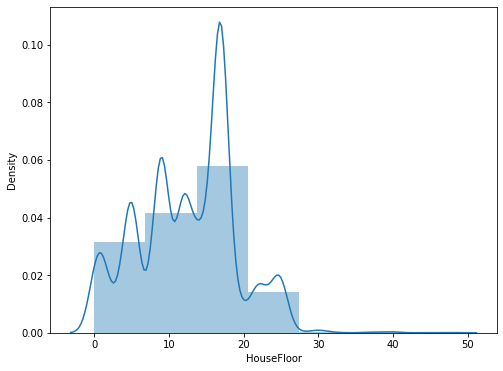

In [52]:
#ВД визуализация обработанных данных
plt.figure(figsize=[8, 6])
sns.distplot(tr_df['HouseFloor'], bins = 7)

In [21]:
#ВОЗРАСТ ДОМА
hy_sorted = np.sort(tr_df['HouseYear'].unique())
print(hy_sorted)

[    1910     1912     1914     1916     1917     1918     1919     1928
     1929     1930     1931     1932     1933     1934     1935     1936
     1937     1938     1939     1940     1941     1942     1947     1948
     1950     1951     1952     1953     1954     1955     1956     1957
     1958     1959     1960     1961     1962     1963     1964     1965
     1966     1967     1968     1969     1970     1971     1972     1973
     1974     1975     1976     1977     1978     1979     1980     1981
     1982     1983     1984     1985     1986     1987     1988     1989
     1990     1991     1992     1993     1994     1995     1996     1997
     1998     1999     2000     2001     2002     2003     2004     2005
     2006     2007     2008     2009     2010     2011     2012     2013
     2014     2015     2016     2017     2018     2019     2020     4968
 20052011]


In [53]:
#ВД работа с выбросами
tr_df.loc[tr_df['HouseYear'] > 2020, 'HouseYear'] = 2020

hy_sorted_new = np.sort(tr_df['HouseYear'].unique())
print(hy_sorted_new)

[1910 1912 1914 1916 1917 1918 1919 1928 1929 1930 1931 1932 1933 1934
 1935 1936 1937 1938 1939 1940 1941 1942 1947 1948 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [54]:
#ВД создание нового признака
tr_df['HouseYear_cat'] = 0

tr_df.loc[tr_df['HouseYear'] <= 1941, 'HouseYear_cat'] = 1
tr_df.loc[(tr_df['HouseYear'] > 1941) & (tr_df['HouseYear'] <= 1945), 'HouseYear_cat'] = 2
tr_df.loc[(tr_df['HouseYear'] > 1945) & (tr_df['HouseYear'] <= 1980), 'HouseYear_cat'] = 3
tr_df.loc[(tr_df['HouseYear'] > 1980) & (tr_df['HouseYear'] <= 2000), 'HouseYear_cat'] = 4
tr_df.loc[(tr_df['HouseYear'] > 2000) & (tr_df['HouseYear'] <= 2010), 'HouseYear_cat'] = 5
tr_df.loc[(tr_df['HouseYear'] > 2010), 'HouseYear_cat'] = 6

tr_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Floor_cat,HouseYear_cat
0,11809,27,3.0,52.513310,32.781260,10.0,4,10.0,2014,0.075424,...,11,3097,0,NaN,0,0,B,305018.871089,2,6
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,30,6207,1,1183.0,1,0,B,177734.553407,3,3
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,33,5261,0,240.0,3,1,B,282078.720850,1,4
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,...,1,264,0,NaN,0,1,B,168106.007630,4,3
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,NaN,0,6,B,343995.102962,5,3
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,...,35,5776,1,2078.0,2,4,B,161044.944138,3,3
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,...,24,4860,1,80.0,0,3,B,142402.739272,1,3
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,...,37,7687,11,176.0,5,5,B,326174.175191,3,4
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,...,1,264,0,NaN,0,1,B,160400.401732,4,3
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,...,5,1564,0,540.0,0,0,B,194756.023945,1,6


count    10000.000000
mean         0.118858
std          0.119025
min          0.000000
25%          0.017647
50%          0.075424
75%          0.195781
max          0.521867
Name: Ecology_1, dtype: float64


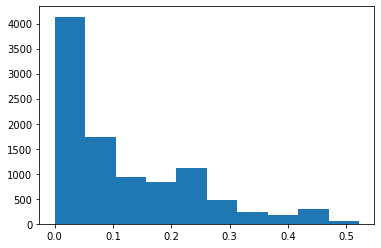

In [85]:
#ЭКОЛОГИЯ 1 - пропусков нет, выбросов тоже
e1_describe = tr_df['Ecology_1'].describe()
print(e1_describe)

plt.hist(tr_df['Ecology_1'], bins=10)
plt.show()

In [55]:
#Преобразуем E2, E3 и S2 в числовые признаки
bin_to_num = {'A': 0, 'B': 1}

tr_df['Ecology_2'] = tr_df['Ecology_2'].map(bin_to_num)
tr_df['Ecology_3'] = tr_df['Ecology_3'].map(bin_to_num)
tr_df['Shops_2'] = tr_df['Shops_2'].map(bin_to_num)

e2e3s2 = tr_df[["Ecology_2", "Ecology_3", "Shops_2"]]
print(e2e3s2)

      Ecology_2  Ecology_3  Shops_2
0             1          1        1
1             1          1        1
2             1          1        1
3             1          1        1
4             1          1        1
...         ...        ...      ...
9995          1          1        1
9996          1          1        0
9997          1          1        1
9998          1          1        1
9999          1          1        1

[10000 rows x 3 columns]


count    10000.000000
mean        24.687000
std         17.532614
min          0.000000
25%          6.000000
50%         25.000000
75%         36.000000
max         74.000000
Name: Social_1, dtype: float64


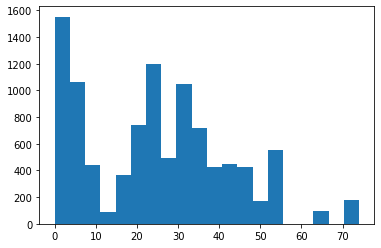

In [84]:
#СОЦ_1 - пропусков нет, выбросов тоже
soc1_describe = tr_df['Social_1'].describe()
print(soc1_describe)

plt.hist(tr_df['Social_1'], bins=20)
plt.show()

count    10000.000000
mean      5352.157400
std       4006.799803
min        168.000000
25%       1564.000000
50%       5285.000000
75%       7227.000000
max      19083.000000
Name: Social_2, dtype: float64


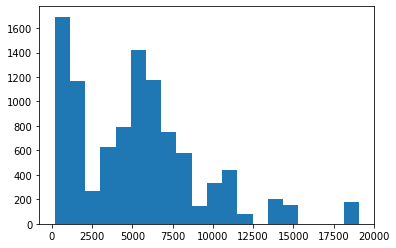

In [82]:
#СОЦ_2 - пропусков нет, выбросов тоже
soc2_describe = tr_df['Social_2'].describe()
print(soc2_describe)

plt.hist(tr_df['Social_2'], bins=20)
plt.show()

count    10000.000000
mean         8.039200
std         23.831875
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max        141.000000
Name: Social_3, dtype: float64


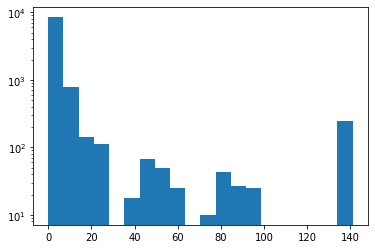

In [80]:
#СОЦ_3 - пропусков нет, выбросов тоже
soc3_describe = tr_df['Social_3'].describe()
print(soc3_describe)

plt.hist(tr_df['Social_3'], bins=20, log=True)
plt.show()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64


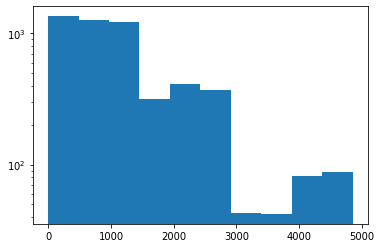

In [56]:
#ЗДОРОВЬЕ_1
h1_describe = tr_df['Healthcare_1'].describe()
print(h1_describe)
plt.hist(tr_df['Healthcare_1'], bins=10, log=True)
plt.show()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Healthcare_1
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


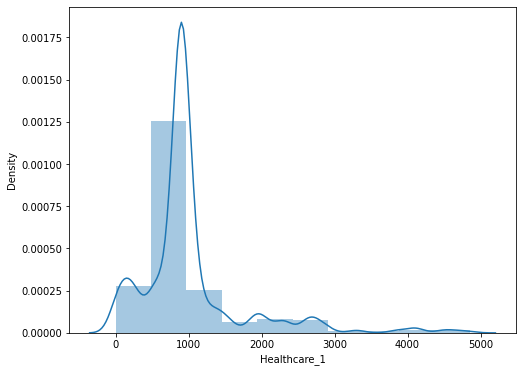

In [57]:
#З_1 обработка пропусков, выбросы отсутствуют
h1_median = tr_df['Healthcare_1'].median()
tr_df['Healthcare_1'] = tr_df['Healthcare_1'].fillna(h1_median)
tr_df['Healthcare_1'].info()

plt.figure(figsize=[8, 6])
sns.distplot(tr_df['Healthcare_1'], bins=10)
plt.show()

count    10000.000000
mean         1.319500
std          1.493601
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: Healthcare_2, dtype: float64


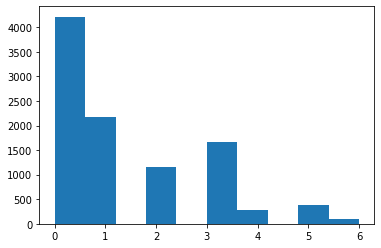

In [58]:
#ЗДОРОВЬЕ_2 - выбросы и пропуски отсутствуют, исправление орфографической ошибки
tr_df.rename(columns = {'Helthcare_2' : 'Healthcare_2'}, inplace = True)

h2_describe = tr_df['Healthcare_2'].describe()
print(h2_describe)
plt.hist(tr_df['Healthcare_2'], bins=10)
plt.show()

count    10000.000000
mean         4.231300
std          4.806341
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         23.000000
Name: Shops_1, dtype: float64


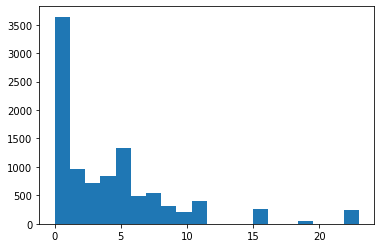

In [86]:
#МАГАЗИНЫ_1 - пропусков нет, выбросов тоже
sh1_describe = tr_df['Shops_1'].describe()
print(sh1_describe)

plt.hist(tr_df['Shops_1'], bins=20)
plt.show()

### Data preprocessing

In [69]:
class DataPreprocessing():

    def __init__(self):
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):       
        # Medians and quantiles
        self.medians = X.median()
        self.square_max_q = X['Square'].quantile(0.975)
        self.square_min_q = X['Square'].quantile(0.025)
        self.lsquare_max_q = X['LifeSquare'].quantile(0.975)
        self.lsquare_min_q = X['LifeSquare'].quantile(0.025)
        self.ksquare_max_q = X['KitchenSquare'].quantile(0.975)
    
    def transform(self, X):
        # Rooms
        X.loc[(X['Rooms'] > 6) | (X['Rooms'] < 1), 'Rooms'] == self.medians['Rooms']
        
        #Square
        X.loc[(tr_df['Square'] > self.square_max_q) | (tr_df['Square'] < self.square_min_q),\
                  'Square'] = self.medians['Square']
        
        #LifeSquare
        X['LifeSquare'] = X['LifeSquare'].fillna(self.medians['LifeSquare'])
        X.loc[(X['LifeSquare'] > self.lsquare_max_q) | (X['LifeSquare'] < self.lsquare_min_q),\
                    'LifeSquare'] = self.medians['LifeSquare']
        #KitchenSquare
        X.loc[(X['KitchenSquare'] > self.ksquare_max_q, 'KitchenSquare')] = self.medians['KitchenSquare']
        
        #HouseFloor
        X.loc[X['HouseFloor'] > 48, 'HouseFloor'] = self.medians['HouseFloor']
        
        #HouseYear
        X.loc[X['HouseYear'] > 2020, 'HouseYear'] = 2020
        
        #Healthcare_1
        X['Healthcare_1'] = X['Healthcare_1'].fillna(self.medians['Healthcare_1'])
        
        #Healthcare_2
        X.rename(columns = {'Helthcare_2' : 'Healthcare_2'}, inplace = True)
        
        return X

### FeatureGenerator

In [87]:
class FeatureGenerator():
    
    def __init__(self):
        self.bin_to_num = None
        
    def transform(self, X):
        #Floor
        X['Floor_cat'] = 0

        X.loc[X['Floor'] <= 3, 'Floor_cat'] = 1  
        X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'Floor_cat'] = 2
        X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'Floor_cat'] = 3
        X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'Floor_cat'] = 4
        X.loc[X['Floor'] > 15, 'Floor_cat'] = 5
        
        #HouseYear
        tr_df['HouseYear_cat'] = 0

        X.loc[X['HouseYear'] <= 1941, 'HouseYear_cat'] = 1
        X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'HouseYear_cat'] = 2
        X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'HouseYear_cat'] = 3
        X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'HouseYear_cat'] = 4
        X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'HouseYear_cat'] = 5
        X.loc[(X['HouseYear'] > 2010), 'HouseYear_cat'] = 6
        
        #Ecology_2, Ecology_3, Shops_2
        self.bin_to_num = {'A': 0, 'B': 1}
        
        X['Ecology_2'] = X['Ecology_2'].map(self.bin_to_num)
        X['Ecology_3'] = X['Ecology_3'].map(self.bin_to_num)
        X['Shops_2'] = X['Shops_2'].map(self.bin_to_num)
        
        return X

### Отбор признаков

In [59]:
tr_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Healthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Floor_cat',
 'HouseYear_cat']

In [96]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Floor_cat', 'HouseYear_cat']

target_name = 'Price'

### Разбиение на test и valid + обработка данных

In [218]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [219]:
#Делим train_df на train и valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [220]:
#Предобработка
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

In [221]:
#Генерация новых признаков
features_generator = FeatureGenerator()

X_train = features_generator.transform(X_train)
X_valid = features_generator.transform(X_valid)
test_df = features_generator.transform(test_df)

In [222]:
#Убираем лишние признаки
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]
X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_2,Shops_1,Shops_2,Floor_cat,HouseYear_cat
8371,70,3.0,72.593847,72.032388,7.0,15,16.0,1976,0.002212,1,1,39,7614,3,1,5,0,4,3.0
5027,24,2.0,38.427761,26.170250,6.0,3,12.0,1969,0.111627,1,1,50,12238,8,2,3,1,1,3.0
9234,13,2.0,59.198892,35.928225,10.0,7,17.0,1999,0.090799,1,1,74,19083,2,5,15,1,3,4.0
3944,113,2.0,38.128402,23.055471,6.0,7,14.0,1970,0.050756,1,1,24,5469,1,0,1,1,3,3.0
6862,27,1.0,40.490421,32.546002,0.0,20,22.0,2019,0.211401,1,1,9,1892,0,0,1,1,5,6.0


### Стандартизация признаков

In [223]:
#Попробовал стандартизировать данные - избежать переобучения не получилось
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names+new_feature_names)

X_valid_scaled = scaler.fit_transform(X_valid)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=feature_names+new_feature_names)

### Построение модели

In [239]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=17,
                                 random_state=42,
                                 n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=17, n_estimators=200,
                      random_state=42)

In [240]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

Train R2:	0.954
Test R2:	0.724


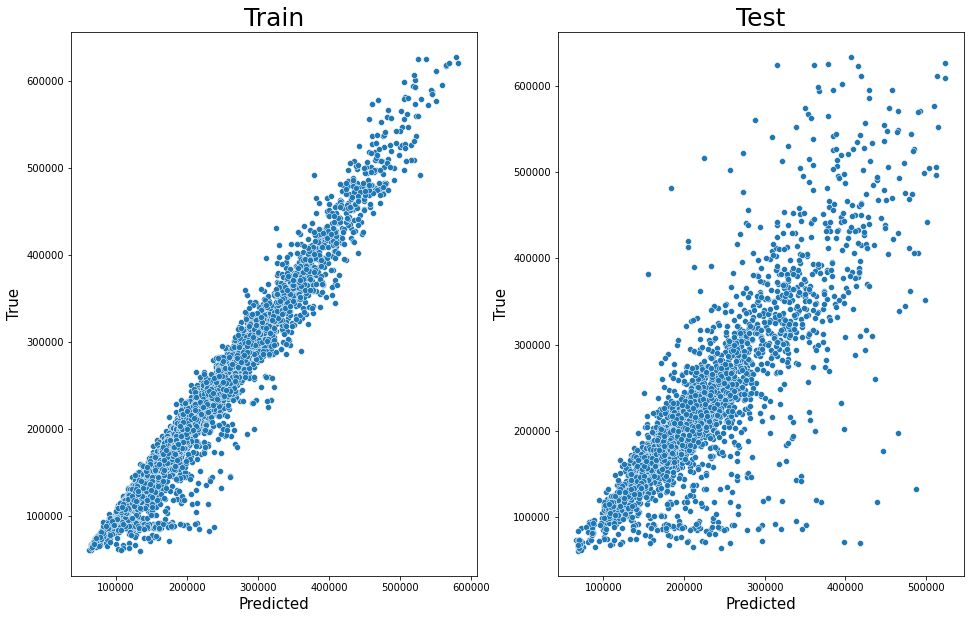

In [241]:
print("Train R2:\t" + str(round(r2(y_train, y_train_preds), 3)))
print("Test R2:\t" + str(round(r2(y_valid, y_test_preds), 3)))
    
plt.figure(figsize=(16,10))
    
plt.subplot(121)
sns.scatterplot(x=y_train_preds, y=y_train)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('True', fontsize = 15)
plt.title('Train', fontsize = 25)
    
plt.subplot(122)
sns.scatterplot(x=y_test_preds, y=y_valid)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('True', fontsize = 15)
plt.title('Test', fontsize = 25)

plt.show()

### Кросс-валидация

In [212]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3,\
                            shuffle=True, random_state=42))
cv_score

array([0.71909847, 0.69631471, 0.72293361])

### Важность признаков

In [209]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
2,Square,0.382047
11,Social_1,0.116094
12,Social_2,0.086407
1,Rooms,0.077025
13,Social_3,0.062895
0,DistrictId,0.048132
8,Ecology_1,0.044926
7,HouseYear,0.034177
3,LifeSquare,0.033456
4,KitchenSquare,0.026349
